# D209 Performance Assessment - Task 2: Predictive Analysis
### by Bader Ale 

# ▶ Research Question
Our research questions is as follows: __.__.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing original dataset
df = pd.read_csv('F:/GitHub Repos/WGU_MSDA/D209_Data Mining I/medical_clean.csv')

# ▶ Data Cleaning  

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.drop(['CaseOrder','Customer_id','Interaction', 'UID', 'City', 'State', 
        'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 
        'Children','ReAdmis', 'Full_meals_eaten','vitD_supp', 'Soft_drink',
        'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
        'Item6', 'Item7', 'Item8'], axis=1, inplace=True) 

In [5]:
df.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274


## Detection and Treatment of Nulls

In [6]:
# Checking for null values
df.isnull().sum()

Area                  0
Age                   0
Income                0
Marital               0
Gender                0
VitD_levels           0
Doc_visits            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
dtype: int64

## Detection and Treatment of Duplicated Values

In [7]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

## Detection and Treatment of Outliers

In [8]:
df.dtypes

Area                   object
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
dtype: object

In [9]:
# Scaling data to make it easier to visualize outliers
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge']])
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge']]),
                         columns=['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge'])

MinMaxScaler()

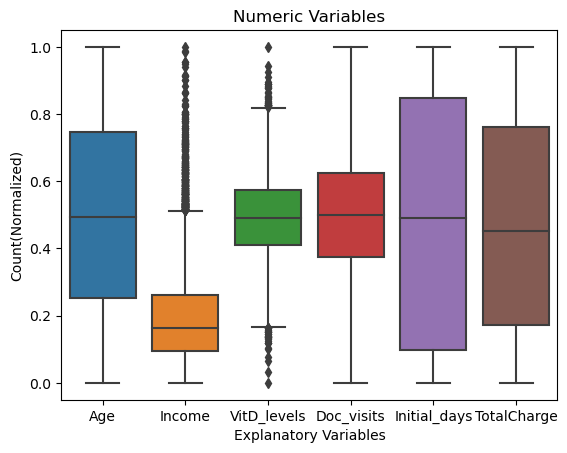

In [10]:
# Visualizing Outliers
sns.boxplot(df_scaled)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Explanatory Variables');

In [11]:
# Removing Outliers using z-scores
import scipy.stats as stats

#Creating New columns for z-scores
df['Income_z_Scores'] = stats.zscore(df['Income'])
df['VitD_level_z_Scores'] = stats.zscore(df['VitD_levels'])

# Removing records with z-scores -3 < z < 3
df = df[(df['Income_z_Scores'] > -3) & (df['Income_z_Scores'] < 3) & (df['VitD_level_z_Scores'] > -3) & (df['VitD_level_z_Scores'] < 3)]
df.drop(['Income_z_Scores', 'VitD_level_z_Scores'], axis=1, inplace=True)

In [12]:
df.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274


# ▶ Data Wrangling  

In [13]:
df.dtypes

Area                   object
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
dtype: object

In [14]:
# Using .get_dummies() to re-express nominal variables
df = pd.get_dummies(data=df, columns=['Area','Marital','Gender', 'Initial_admin','HighBlood',
                                      'Stroke','Overweight', 'Arthritis','Diabetes', 'Hyperlipidemia', 
                                      'BackPain', 'Anxiety', 'Allergic_rhinitis','Reflux_esophagitis', 
                                      'Asthma','Services'], drop_first=True)

In [15]:
# Using Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
complication_encoded = enc.fit_transform(df[['Complication_risk']])
df['Complication_risk'] = complication_encoded

In [16]:
df.head()

,Age,Income,VitD_levels,Doc_visits,Complication_risk,Initial_days,TotalCharge,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,19.141466,6,2.0,10.585770,3726.702860,True,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False,True,True,True,False,True,False,False,False
1,51,46805.99,18.940352,4,0.0,15.129562,4193.190458,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
2,53,14370.14,18.057507,4,2.0,4.772177,2434.234222,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False
3,78,39741.49,16.576858,4,2.0,1.714879,2127.830423,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False
4,22,1209.56,17.439069,5,1.0,1.254807,2113.073274,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False


# ▶ Decision Tree

In [17]:
# Label and FEature Assignment
X = df.drop('HighBlood_Yes', axis = 1)
y = df['HighBlood_Yes'].values

In [18]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify=y)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a range of values for max_depth to test
max_depths = range(1, 20)

# Loop over max_depth values and evaluate model performance
best_accuracy = 0
best_max_depth = 0

for max_depth in max_depths:
    # Train a DecisionTreeClassifier model with current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Make predictions on test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and max_depth if current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

# Print best max_depth and corresponding accuracy
print("Best Max_Depth:", best_max_depth)
print("Accuracy:", best_accuracy)

DecisionTreeClassifier(max_depth=1)

DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=4)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=7)

DecisionTreeClassifier(max_depth=8)

DecisionTreeClassifier(max_depth=9)

DecisionTreeClassifier(max_depth=10)

DecisionTreeClassifier(max_depth=11)

DecisionTreeClassifier(max_depth=12)

DecisionTreeClassifier(max_depth=13)

DecisionTreeClassifier(max_depth=14)

DecisionTreeClassifier(max_depth=15)

DecisionTreeClassifier(max_depth=16)

DecisionTreeClassifier(max_depth=17)

DecisionTreeClassifier(max_depth=18)

DecisionTreeClassifier(max_depth=19)

Best Max_Depth: 11
Accuracy: 0.6111864406779661


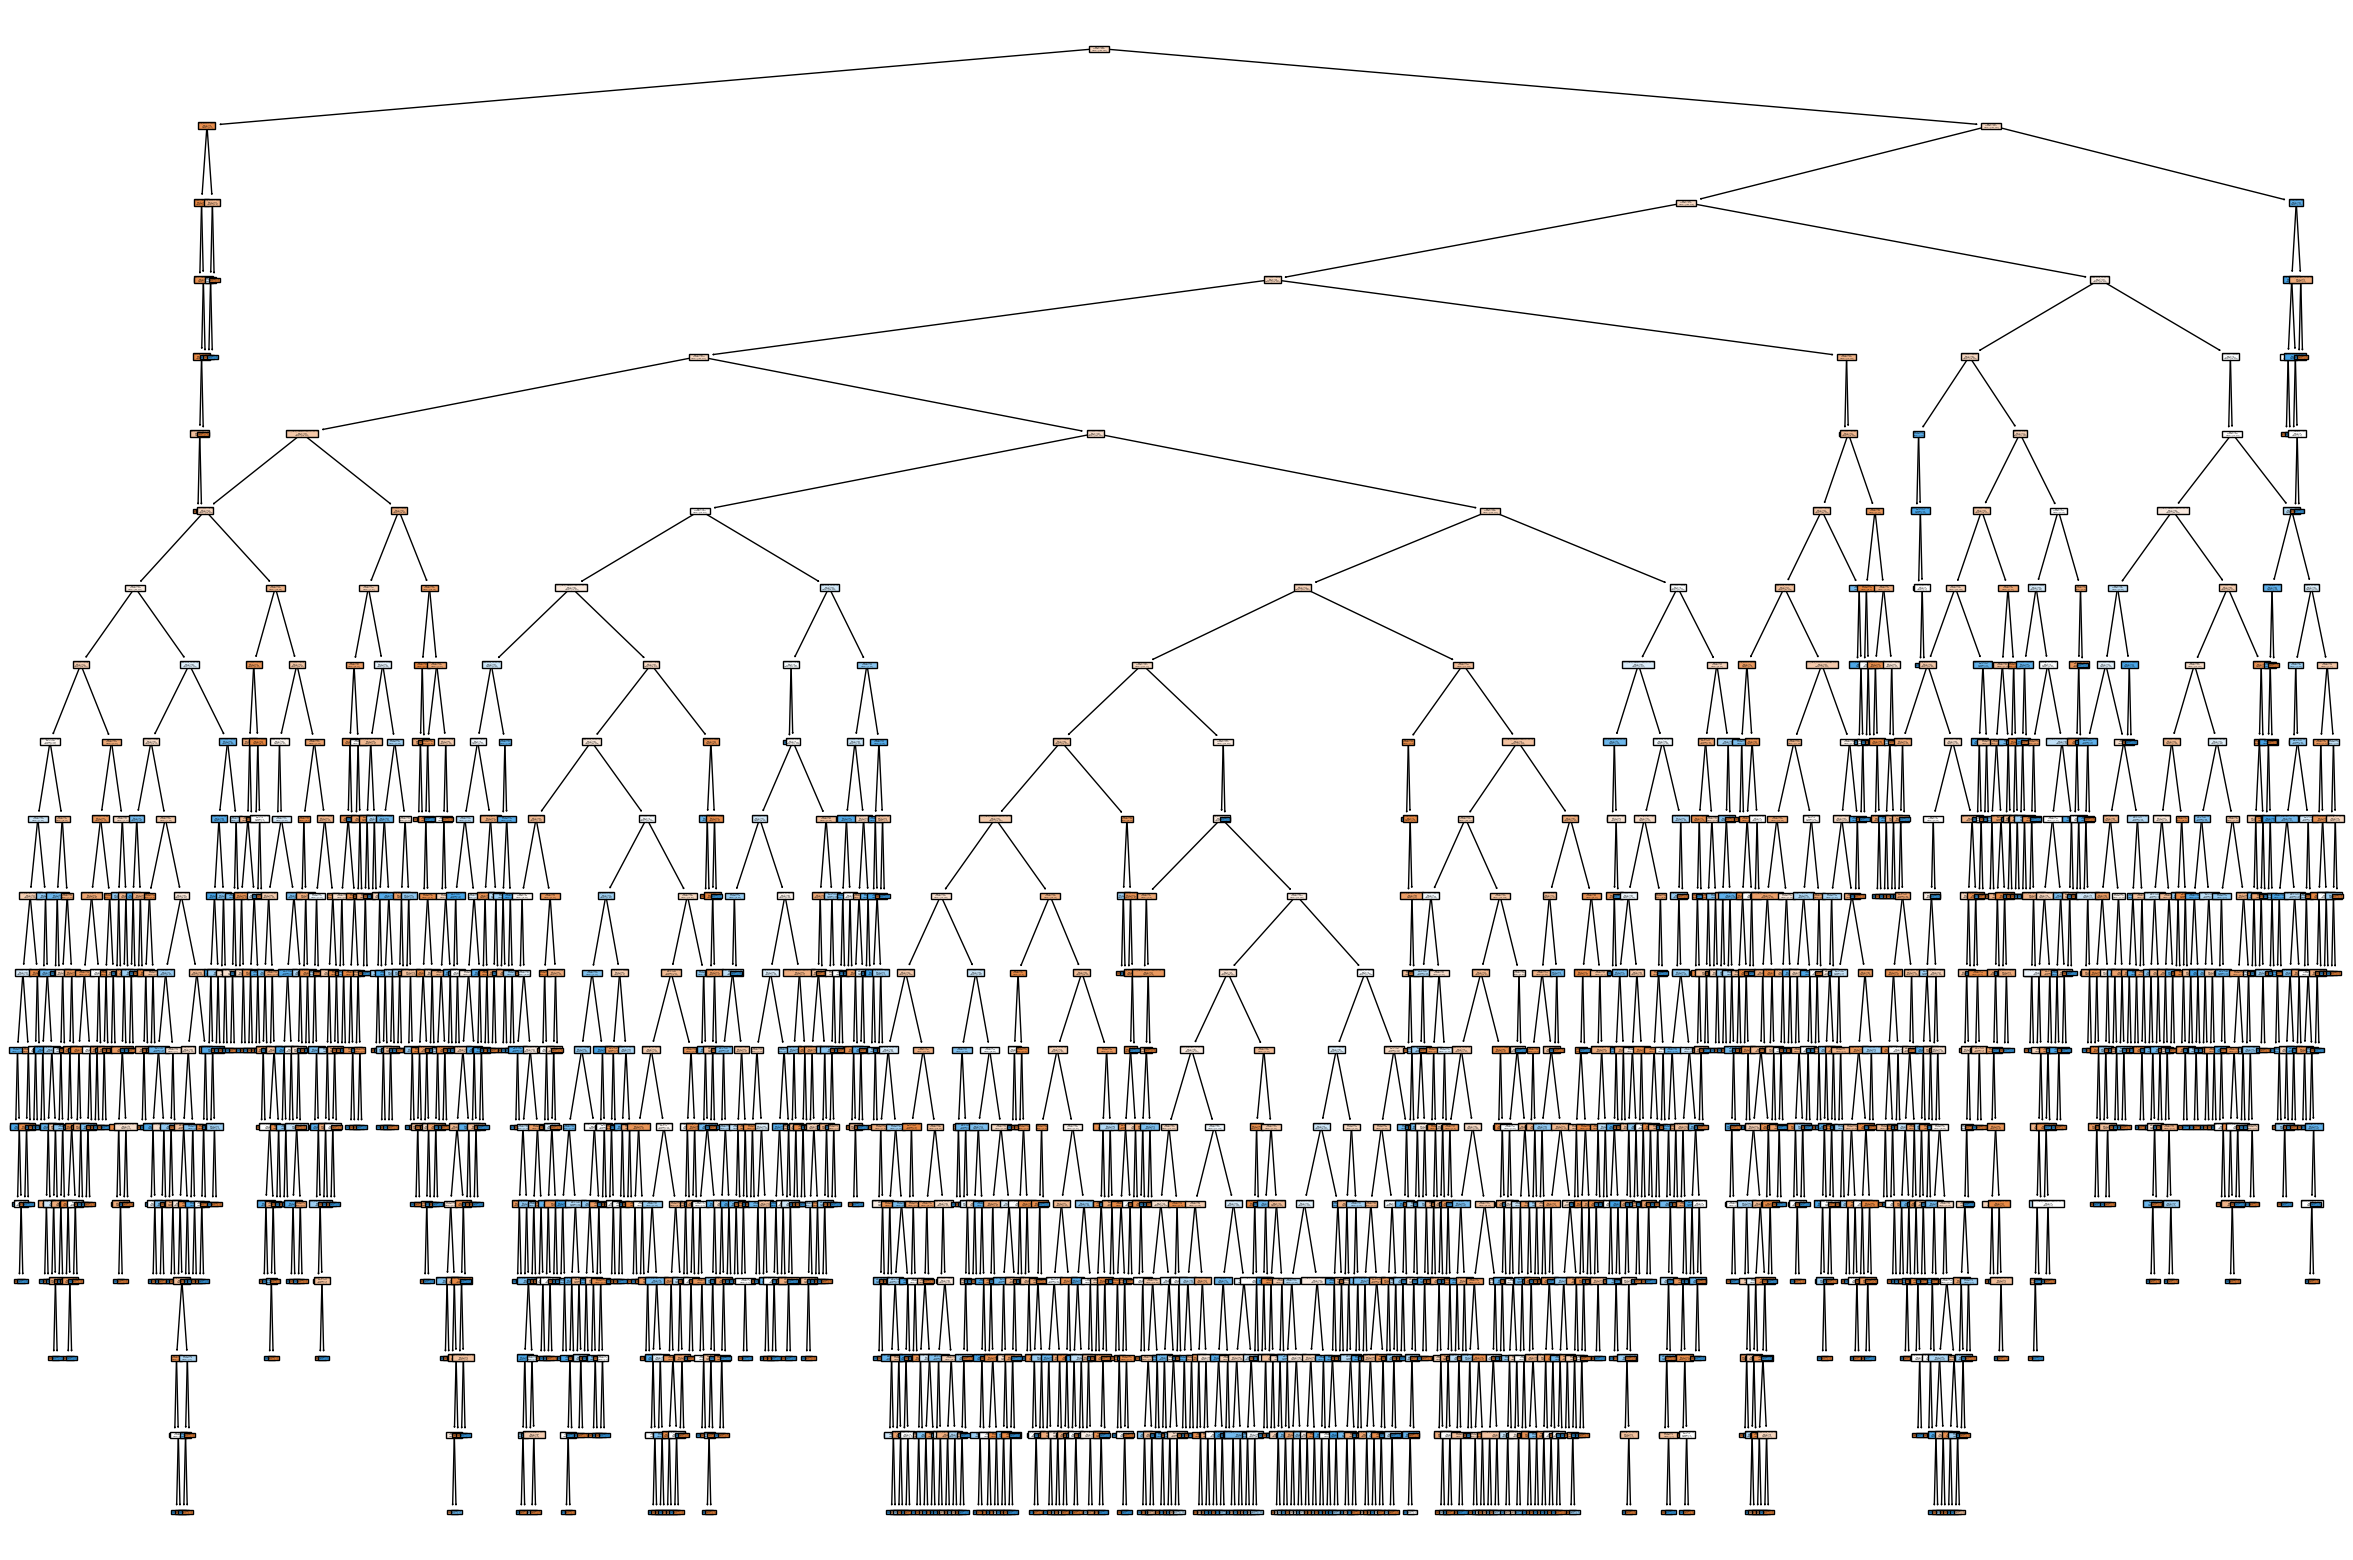

In [23]:
# # Visualizing Decision Tree
# from sklearn import tree
# plt.figure(figsize=(30,20))
# tree.plot_tree(clf,feature_names=X.columns.to_list(),filled=True);